# Setup Spark in Google Colab
*reference: https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/*


*to install other versions, get the download link from https://spark.apache.org/downloads.html*

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

^C


In [52]:
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

--2022-12-15 18:16:41--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.1-bin-hadoop3.tgz.1’

          spark-3.3   0%[                    ]       0  --.-KB/s               ^C


In [53]:
!tar -xvf spark-3.3.1-bin-hadoop3.tgz

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.1-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.1-bin-hadoop3/R/lib/Spar

In [54]:
!pip install findspark

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/parser.py", line 5, in <module>
    import shutil
  File "/usr/lib/python3.8/shutil.py", line 22, in <module>
    import bz2
  File "/usr/lib/python3.8/bz2.py", line 19,

In [55]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [56]:
import findspark
findspark.init()

In [57]:
findspark.find()

'/content/spark-3.3.1-bin-hadoop3'

In [58]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [59]:
sc = spark.sparkContext

# Project Code


In [ ]:
fileName = 'Property_Assessments.csv'
propertyRDD = sc.textFile(fileName, 8)
propertyRDD.take(2)

['ROLL_YEAR,ROLL_NUMBER,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,RE_ASSESSED_VALUE,NR_ASSESSED_VALUE,FL_ASSESSED_VALUE,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,UNIQUE_KEY,YEAR_OF_CONSTRUCTION,LAND_USE_DESIGNATION,PROPERTY_TYPE,LAND_SIZE_SM,LAND_SIZE_SF,LAND_SIZE_AC,SUB_PROPERTY_USE,POINT',
 '2017,070027800,1930 MAYNARD RD SE,26180000,NR,Non-residential,,,,MLI,MAYLAND,51.04784225611974,-114.00981065031557,2017070027800,1965,I-G,LI,28350.8,305175,7.01,CS1835,POINT (-114.009810650316 51.04784225612)']

Filtering Fields Relevant to the Analysis

In [ ]:
def extractFields(row):
  data = row.split(',')
  return f'{data[0]},{data[2]},{data[3]},{data[14]}'

extractedPropertyRDD = (propertyRDD
                        .filter(lambda x: x.split(',')[4] == 'RE')
                        .map(extractFields))

extractedPropertyRDD.take(10)

['2021,47 SADDLEBACK WY NE,406500,2000',
 '2021,176 EDELWEISS DR NW,1080000,1985',
 '2021,472 SILVERGROVE GD NW,670000,1988',
 '2021,5023 VICEROY DR NW,640000,1966',
 '2021,6327 THORNABY WY NW,465000,1975',
 '2021,196 CASTLERIDGE CL NE,303500,1981',
 '2021,119 400 AUBURN MEADOWS CM SE,151000,',
 '2021,120 400 AUBURN MEADOWS CM SE,242500,',
 '2021,4315 CENTRE ST NW,713000,1952',
 '2021,4307 CENTRE ST NW,713000,1952']

Group By Quadrants

In [ ]:
def groupByQuadrants(row):
  data = row.split(',')
  address = data[1]
  price = int(data[2])
  quadrant = address.split()[-1]
  return (quadrant, price)

groupedPropertyRDD = extractedPropertyRDD.map(groupByQuadrants)
groupedPropertyRDD.take(10)

[('NE', 406500),
 ('NW', 1080000),
 ('NW', 670000),
 ('NW', 640000),
 ('NW', 465000),
 ('NE', 303500),
 ('SE', 151000),
 ('SE', 242500),
 ('NW', 713000),
 ('NW', 713000)]

Average Per Quadrant

In [ ]:
propertyCount = groupedPropertyRDD.countByKey()
(groupedPropertyRDD
 .reduceByKey(lambda x,y: x + y)
 .map(lambda x: (x[0], round(x[1] / propertyCount[x[0]], 2)))
 .collect())


[('NE', 379490.14), ('SW', 553929.45), ('NW', 548122.67), ('SE', 361091.87)]

Most Expensive Property Per Quadrant

In [ ]:
groupedPropertyRDD.reduceByKey(lambda x, y: max(x, y)).collect()

[('NE', 61290000), ('SW', 127720000), ('NW', 80040000), ('SE', 103940000)]

Creating RDD for linear Regression

In [ ]:
def extractData(row):
  """
    value[3], year[0] , address[2] getquadrant, class[4], yearofconstruction[14] -> age, landsquarefoot[18]
  """
  data = row.split(',')
  return f'{data[3]},{data[0]},{data[2].split()[-1]},{data[4]},{data[14]},{data[18]}'

# filter for only residential properties and rows that don't have null values
def checkForNullValuesAndNonResidential(row):
  data = row.split(',')
  if data[3] != 'RE':
    return False
  elif not data[0].isnumeric() or not data[1].isnumeric() or not data[4].isnumeric() or not data[5].isnumeric():
    return False
  
  return True

data1 = propertyRDD.map(lambda x: extractData(x)).filter(lambda x: checkForNullValuesAndNonResidential(x))

print(data1.take(1))

['406500,2021,NE,RE,2000,3810']


we can remove the Residential column now since it only has one possible value, and convert year of construction to age

In [ ]:
# now that we have filtered for RE, we can remove that column
def removeREAndConvertYearToAge(row):
  data = row.split(',')
  return f'{data[0]},{data[1]},{data[2]},{2022 - int(data[4])},{data[5]}'

data2 = data1.map(lambda x: removeREAndConvertYearToAge(x))

print(data2.take(1))

['406500,2021,NE,22,3810']


lets convert quadrant to a number

In [ ]:
def modifyquadrant(row):
  data = row.split(",")
  quadrant = '0'
  if data[2] == 'NE':
    quadrant = '1'
  elif data[2] == 'SE':
    quadrant = '2'
  elif data[2] == 'NW':
    quadrant = '3'
  else:
    quadrant = '4'
  return f'{data[0]},{data[1]},{quadrant},{data[3]},{data[4]}'

data3 = data2.map(lambda x: modifyquadrant(x))

print(data3.take(1))

['406500,2021,1,22,3810']


now lets define what is a feature and what is a label

In [ ]:
from pyspark.mllib.regression import LabeledPoint
import numpy as np

In [ ]:
# label is assessed value [0]
# everything else if a feature

def parsePoint(line):
    label_features = line.split(',')
    ret_val = LabeledPoint(label_features[0],label_features[1:5])
    return ret_val

def removeMissingFeatureDataPoints(row):
    data = row.split(",")
    if len(data) == 5:
      return True
    return False

data4 = data3.filter(lambda x: removeMissingFeatureDataPoints(x)).map(lambda x: parsePoint(x))
firstPoint = data4.take(1)
firstLabel = firstPoint[0].label
firstFeatureSet = firstPoint[0].features

print("label: {}".format(firstLabel))
print("features: {}".format(firstFeatureSet))



label: 406500.0
features: [2021.0,1.0,22.0,3810.0]


normalizing features since we have varying magnitudes

In [ ]:
def normalizeFeatures(lp):
    normalizedFeatures = list()
    for i in range(0,len(lp.features)):
        feature = (lp.features[i]-broadcastMean.value[i])/broadcastStdev.value[i]
        # leave quadrant alone
        if i == 1:
          feature = lp.features[i]
        normalizedFeatures.insert(i,feature)
    return LabeledPoint(lp.label, normalizedFeatures)

def getNormalizedRDD(nonNormalizedRDD): 
    meanList = list()
    stdevList = list()
    numFeatures = len(nonNormalizedRDD.take(1)[0].features)
    for i in range(0,numFeatures):        
        featureRDD = nonNormalizedRDD.map(lambda lp: lp.features[i])
        featureMean = featureRDD.mean()
        featureStdev = featureRDD.stdev()
        meanList.insert(i,featureMean)
        stdevList.insert(i,featureStdev)
    global broadcastMean 
    broadcastMean = sc.broadcast(meanList)
    global broadcastStdev 
    broadcastStdev = sc.broadcast(stdevList)
    returnRDD = nonNormalizedRDD.map(normalizeFeatures)
    return returnRDD

data5 = getNormalizedRDD(data4)
print(data5.take(1))

[LabeledPoint(406500.0, [-12.946126009948,1.0,-1.3509379044222625,-0.35455221715959995])]


splitting data into train, validation, test sets

In [ ]:
weights = [0.6, 0.2, 0.2] # train/validation/test split
seed = 1
train, validation, test = data5.randomSplit(weights,seed)
train.cache()
validation.cache()
test.cache()
nTrain = train.count()
nVal = validation.count()
nTest = test.count()

print('total data set has {} rows'.format(data5.count()))
print('60% is allocated for training and has {} rows'.format(nTrain))
print('20% is allocated for validation and has {} rows'.format(nVal))
print('20% is allocated for testing and has {} rows'.format(nTest))

total data set has 155114 rows
60% is allocated for training and has 93064 rows
20% is allocated for validation and has 31027 rows
20% is allocated for testing and has 31023 rows


creating a baseline using the mean to later compare against our regression

In [ ]:
# calculate the mean property assessment

meanPropertyAssessment = (data5.map(lambda s: s.label)).mean()
print(meanPropertyAssessment)

483295.1933416718


score, if mean is the prediction

In [ ]:
import math
def squaredError(label, prediction):
    sqrError = (label-prediction)*(label-prediction)
    return sqrError

def calcRMSE(labelsAndPreds):
    sqrSum = labelsAndPreds.map(lambda s: squaredError(s[0],s[1])).sum()
    return math.sqrt(sqrSum/labelsAndPreds.count())

In [ ]:
labelsAndPredsTrain = train.map(lambda s: (s.label,meanPropertyAssessment))
rmseTrain = calcRMSE(labelsAndPredsTrain)

labelsAndPredsVal = validation.map(lambda s: (s.label, meanPropertyAssessment))
rmseVal = calcRMSE(labelsAndPredsVal)

labelsAndPredsTest = test.map(lambda s: (s.label, meanPropertyAssessment))
rmseTest = calcRMSE(labelsAndPredsTest)

print('Baseline Train RMSE = {0:.3f}'.format(rmseTrain))
print('Baseline Validation RMSE = {0:.3f}'.format(rmseVal))
print('Baseline Test RMSE = {0:.3f}'.format(rmseTest))

Baseline Train RMSE = 1177518.041
Baseline Validation RMSE = 1103201.361
Baseline Test RMSE = 1045024.093


Now lets try linear regression

In [ ]:
from pyspark.mllib.linalg import DenseVector
from pyspark.mllib.regression import LinearRegressionWithSGD

In [ ]:
numIters = 500  # iterations
alpha = 1.0  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

In [ ]:
LinearRegressionModel1 = LinearRegressionWithSGD.train(train,numIters,alpha,miniBatchFrac,initialWeights=None,regParam=reg,regType=regType,intercept=useIntercept)

weightsLR1 = LinearRegressionModel1.weights
interceptLR1 = LinearRegressionModel1.intercept

print("the weights found are: {}".format(weightsLR1))
print("the intercept found is: {}".format(interceptLR1))

/content/spark-3.3.1-bin-hadoop3/python/pyspark/mllib/regression.py:367: FutureWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.", FutureWarning)


the weights found are: [-73737.91773216928,99247.02175655396,11176.653874574313,-31745.239924599053]
the intercept found is: 196784.05514647934


We can predict labels using our created linear regression model

In [ ]:
samplePoint = train.take(1)[0]
samplePrediction = LinearRegressionModel1.predict(samplePoint.features)
print("the features given are: {}".format(samplePoint.features))
print("the predicted property assessment is: {}".format(samplePrediction))
print("the actual label is: {}".format(samplePoint.label))

the features given are: [-12.946126009948,1.0,-1.3509379044222625,-0.35455221715959995]
the predicted property assessment is: 1246807.8314106355
the actual label is: 406500.0


In [ ]:
labelsAndPredsTrain2 = train.map(lambda lp: (lp.label, LinearRegressionModel1.predict(lp.features)))
rmseTrain2 = calcRMSE(labelsAndPredsTrain2)

labelsAndPredsVal2 = validation.map(lambda lp: (lp.label, LinearRegressionModel1.predict(lp.features)))
rmseVal2 = calcRMSE(labelsAndPredsVal2)

labelsAndPredsTest2 = test.map(lambda lp: (lp.label, LinearRegressionModel1.predict(lp.features)))
rmseTest2 = calcRMSE(labelsAndPredsTest2)

print('Linear Regression Model 1 Train RMSE = {0:.3f}'.format(rmseTrain2))
print('Linear Regression Model 1 Validation RMSE = {0:.3f}'.format(rmseVal2))
print('Linear Regression Model 1 Test RMSE = {0:.3f}'.format(rmseTest2))

Linear Regression Model 1 Train RMSE = 1172425.558
Linear Regression Model 1 Validation RMSE = 1097942.094
Linear Regression Model 1 Test RMSE = 1036740.263


Comparing with Baseline RMSE

In [ ]:
print('Baseline Train RMSE = {0:.3f}'.format(rmseTrain))
print('Baseline Validation RMSE = {0:.3f}'.format(rmseVal))
print('Baseline Test RMSE = {0:.3f}'.format(rmseTest))

Baseline Train RMSE = 1177518.041
Baseline Validation RMSE = 1103201.361
Baseline Test RMSE = 1045024.093


RMSE values went down for all 3 data sets, which means our linear regression model is better then predicting using the average.

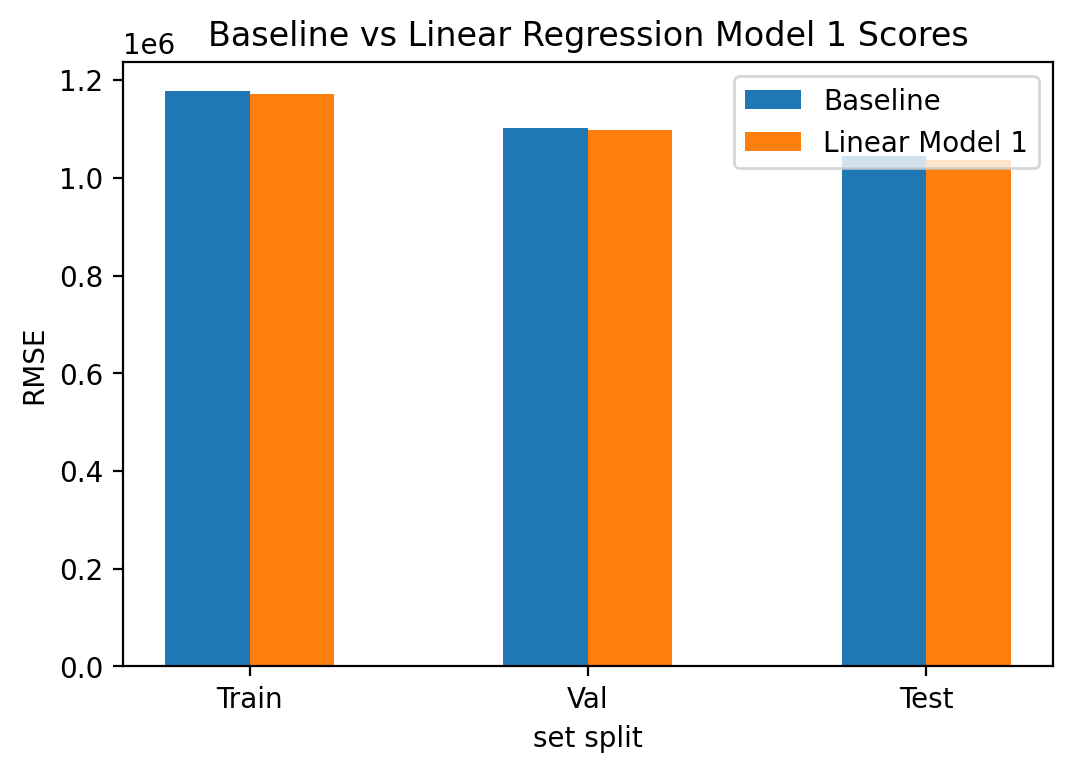

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_axis_labels = ["Train", "Val", "Test"]
source_labels = ["Baseline", "Linear Model 1"]

scores = np.array([[rmseTrain, rmseVal, rmseTest], [rmseTrain2, rmseVal2, rmseTest2]])

x = np.arange(len(x_axis_labels))
width = 0.25

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores[0], width, label=source_labels[0])
rects2 = ax.bar(x + width/2, scores[1], width, label=source_labels[1])

ax.set_title('Baseline vs Linear Regression Model 1 Scores')
ax.set_ylabel('RMSE')
ax.set_xlabel('set split')
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(x_axis_labels, rotation=0)

plt.show()




maybe we can improve our linear model if we try to optimize our regularization by tuning alpha

we will train the model using different values of alpha 0 - 100, then test it against the validation set. We will use the alpha that led to the best validation scores

In [82]:
numIters = 100  # iterations
alpha = 1.0  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

rmseValList = []
rmseValIterList = []

lowestRMSEVal3 = None
bestIter = None

while numIters < 5000:
  LinearRegressionModel2 = LinearRegressionWithSGD.train(train,numIters,alpha,miniBatchFrac,initialWeights=None,regParam=reg,regType=regType,intercept=useIntercept)
  labelsAndPredsVal3 = validation.map(lambda lp: (lp.label, LinearRegressionModel2.predict(lp.features)))
  rmseVal3 = calcRMSE(labelsAndPredsVal3)
  rmseValList.append(rmseVal3)
  rmseValIterList.append(numIters)
  if bestIter == None or rmseVal3 < lowestRMSEVal3:
    lowestRMSEVal3 = rmseVal3
    bestIter = numIters
  # using increments of 100 because execution time was taking a long time
  numIters += 100

print("Best RMSE val found is: {}".format(lowestRMSEVal3))
print("Using number of iterations: {}".format(bestIter))



Best RMSE val found is: 1097942.0939468725
Using number of iterations: 100


lets see how the number of iterations impacted validation RMSE

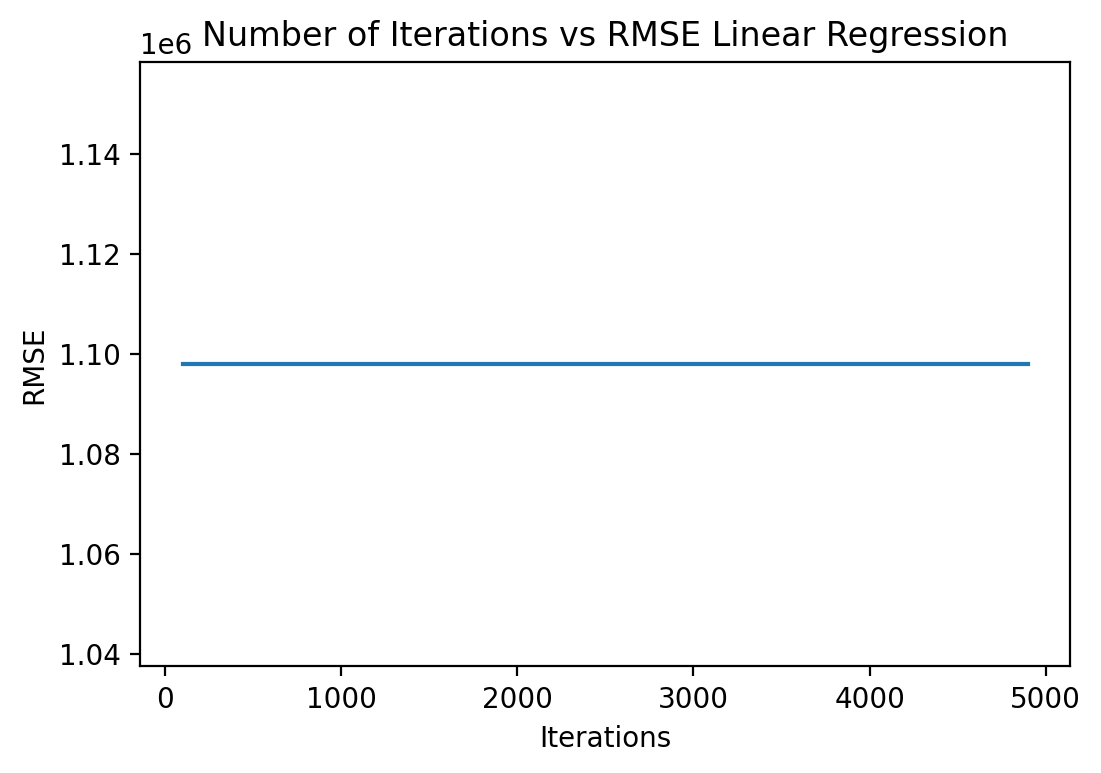

In [83]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.plot(rmseValIterList, rmseValList)
plt.title('Number of Iterations vs RMSE Linear Regression')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.show()

interestingly enough, modifying the number of iterations did not have any impact

In [84]:
LinearRegressionModel2 = LinearRegressionWithSGD.train(train,bestIter,alpha,miniBatchFrac,initialWeights=None,regParam=reg,regType=regType,intercept=useIntercept)

labelsAndPredsTrain3 = train.map(lambda lp: (lp.label, LinearRegressionModel2.predict(lp.features)))
rmseTrain3 = calcRMSE(labelsAndPredsTrain3)

labelsAndPredsVal3 = validation.map(lambda lp: (lp.label, LinearRegressionModel2.predict(lp.features)))
rmseVal3 = calcRMSE(labelsAndPredsVal3)

labelsAndPredsTest3 = test.map(lambda lp: (lp.label, LinearRegressionModel2.predict(lp.features)))
rmseTest3 = calcRMSE(labelsAndPredsTest3)

print('Linear Regression Model 2 Train RMSE = {0:.3f}'.format(rmseTrain3))
print('Linear Regression Model 2 Validation RMSE = {0:.3f}'.format(rmseVal3))
print('Linear Regression Model 2 Test RMSE = {0:.3f}'.format(rmseTest3))

Linear Regression Model 2 Train RMSE = 1172425.558
Linear Regression Model 2 Validation RMSE = 1097942.094
Linear Regression Model 2 Test RMSE = 1036740.263


lets try a different regression model, and see if it improves our scores

In [95]:
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.evaluation import RegressionMetrics

randomForestModel1 = RandomForest.trainRegressor(train, categoricalFeaturesInfo={}, numTrees=8)

trainPredictions = randomForestModel1.predict(train.map(lambda x: x.features))
trainZipped = train.map(lambda x: x.label).zip(trainPredictions)
trainMetrics = RegressionMetrics(trainZipped)

valPredictions = randomForestModel1.predict(validation.map(lambda x: x.features))
valZipped = validation.map(lambda x: x.label).zip(valPredictions)
valMetrics = RegressionMetrics(valZipped)

testPredictions = randomForestModel1.predict(test.map(lambda x: x.features))
testZipped = test.map(lambda x: x.label).zip(testPredictions)
testMetrics = RegressionMetrics(testZipped)

print('Random Forest Train RMSE = {0:.3f}'.format(trainMetrics.rootMeanSquaredError))
print('Random Forest Validation RMSE = {0:.3f}'.format(valMetrics.rootMeanSquaredError))
print('Random Forest Test RMSE = {0:.3f}'.format(testMetrics.rootMeanSquaredError))

/content/spark-3.3.1-bin-hadoop3/python/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Random Forest Train RMSE = 1106172.349
Random Forest Validation RMSE = 1068890.224
Random Forest Test RMSE = 1003553.310


random forest seems to have worked better then both our baseline and linear regression model

lets try changing the number of trees and see if it has an impact

In [98]:
numTrees = 1

listofRMSE = []
listofNumTrees = []

bestRMSE = None
bestNumTrees = None

while numTrees < 100:
  randomForestModel2 = RandomForest.trainRegressor(train, categoricalFeaturesInfo={}, numTrees=numTrees)

  valPredictions2 = randomForestModel2.predict(validation.map(lambda x: x.features))
  valZipped2 = validation.map(lambda x: x.label).zip(valPredictions2)
  valMetrics2 = RegressionMetrics(valZipped2)
  
  if bestNumTrees == None or bestRMSE > valMetrics2.rootMeanSquaredError:
    bestRMSE = valMetrics2.rootMeanSquaredError
    bestNumTrees = numTrees
  
  listofRMSE.append(valMetrics2.rootMeanSquaredError)
  listofNumTrees.append(numTrees)

  numTrees += 1

print("best validation RMSE found is: {}".format(bestRMSE))
print("using number of Trees: {}".format(bestNumTrees))

  

/content/spark-3.3.1-bin-hadoop3/python/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


best validation RMSE found is: 1055761.6267678218
using number of Trees: 25


lets see how the number of trees impacted rmse

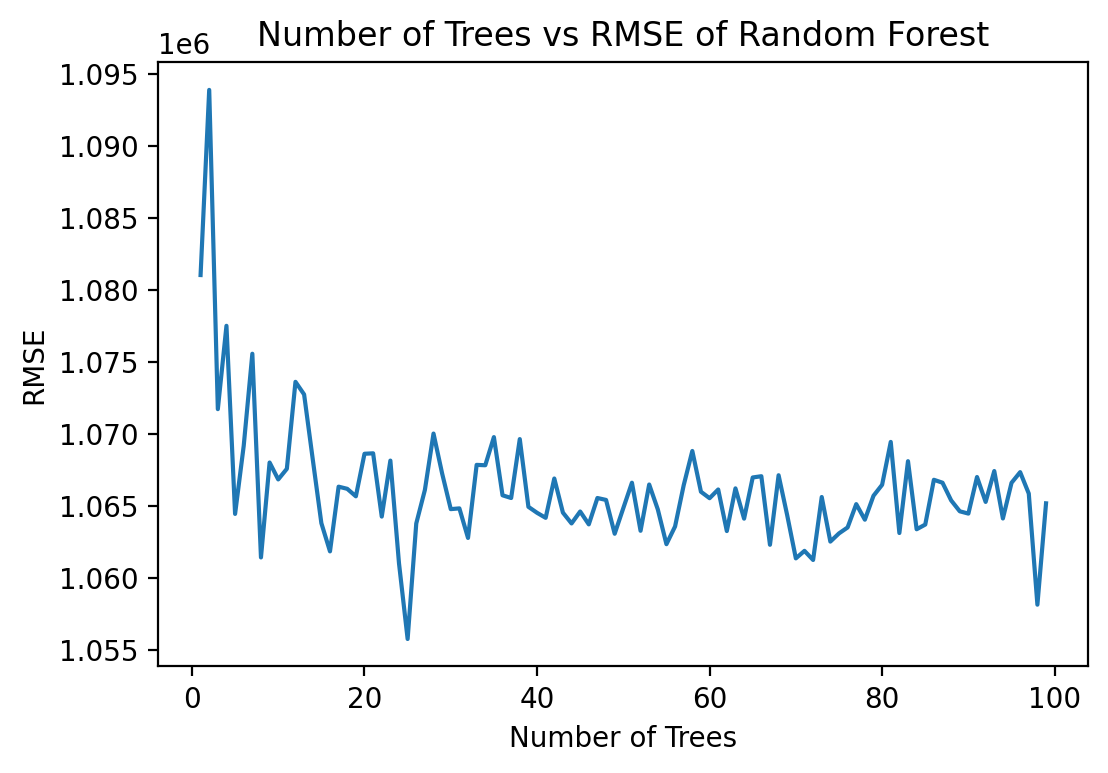

In [99]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.plot(listofNumTrees, listofRMSE)
plt.title('Number of Trees vs RMSE of Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.show()

In [100]:
randomForestModel3 = RandomForest.trainRegressor(train, categoricalFeaturesInfo={}, numTrees=bestNumTrees)

trainPredictions3 = randomForestModel3.predict(train.map(lambda x: x.features))
trainZipped3 = train.map(lambda x: x.label).zip(trainPredictions3)
trainMetrics3 = RegressionMetrics(trainZipped3)

valPredictions3 = randomForestModel3.predict(validation.map(lambda x: x.features))
valZipped3 = validation.map(lambda x: x.label).zip(valPredictions3)
valMetrics3 = RegressionMetrics(valZipped3)

testPredictions3 = randomForestModel3.predict(test.map(lambda x: x.features))
testZipped3 = test.map(lambda x: x.label).zip(testPredictions3)
testMetrics3 = RegressionMetrics(testZipped3)

print('Random Forest Train RMSE = {0:.3f}'.format(trainMetrics3.rootMeanSquaredError))
print('Random Forest Validation RMSE = {0:.3f}'.format(valMetrics3.rootMeanSquaredError))
print('Random Forest Test RMSE = {0:.3f}'.format(testMetrics3.rootMeanSquaredError))

/content/spark-3.3.1-bin-hadoop3/python/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Random Forest Train RMSE = 1109117.228
Random Forest Validation RMSE = 1067447.562
Random Forest Test RMSE = 982974.403


looks like random forest with an optimized number of trees had the best test scores vs the baseline and linear regression.

Lets plot them

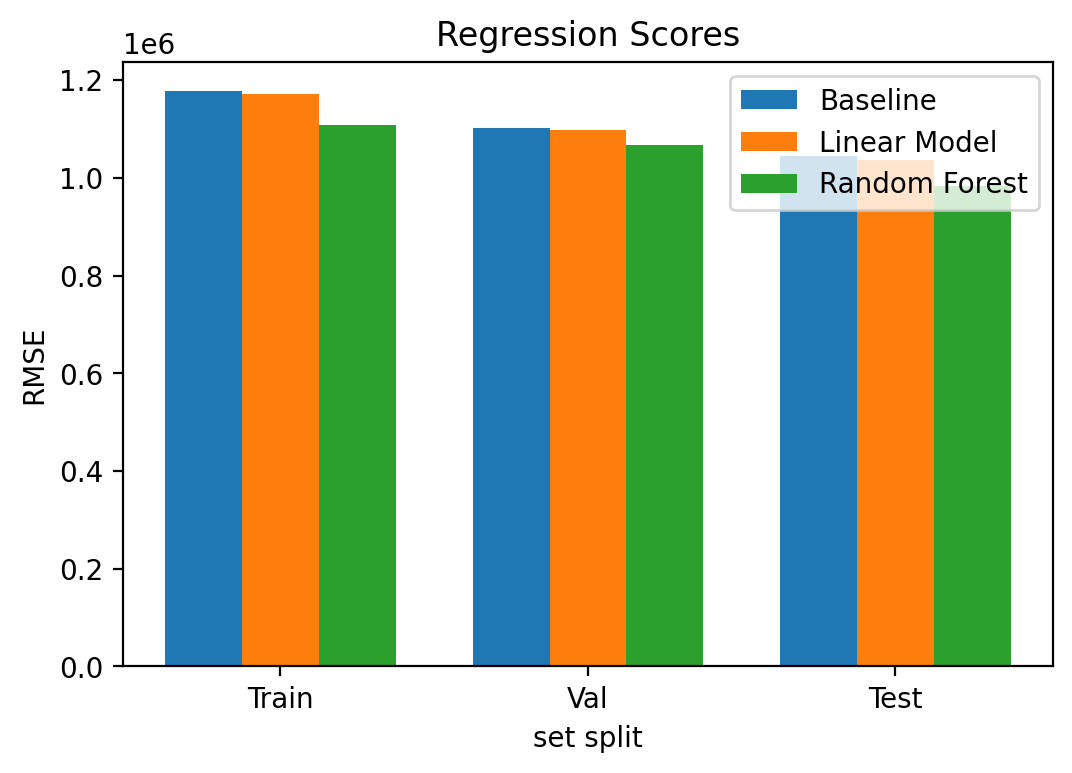

In [101]:
x_axis_labels = ["Train", "Val", "Test"]
source_labels = ["Baseline", "Linear Model", "Random Forest"]

scores = np.array([[rmseTrain, rmseVal, rmseTest], [rmseTrain2, rmseVal2, rmseTest2], [trainMetrics3.rootMeanSquaredError, valMetrics3.rootMeanSquaredError, testMetrics3.rootMeanSquaredError]])

x = np.arange(len(x_axis_labels))
width = 0.25

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, scores[0], width, label=source_labels[0])
rects2 = ax.bar(x, scores[1], width, label=source_labels[1])
rects3 = ax.bar(x + width, scores[2], width, label=source_labels[2])

ax.set_title('Regression Scores')
ax.set_ylabel('RMSE')
ax.set_xlabel('set split')
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(x_axis_labels, rotation=0)

plt.show()